# Завдання 5. Візуалізація обходу бінарного дерева



Використовуючи код із завдання 4 для побудови бінарного дерева, необхідно створити програму на Python, яка візуалізує обходи дерева: у глибину та в ширину.



Вона повинна відображати кожен крок у вузлах з різними кольорами, використовуючи 16-систему RGB (приклад #1296F0). Кольори вузлів мають змінюватися від темних до світлих відтінків, залежно від послідовності обходу. Кожен вузол при його відвідуванні має отримувати унікальний колір, який візуально відображає порядок обходу.



- Примітка. Використовуйте стек та чергу, НЕ рекурсію

In [321]:
import uuid

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Node:
  def __init__(self, key, color="skyblue"):
    self.left = None
    self.right = None
    self.val = key
    self.color = color # Додатковий аргумент для зберігання кольору вузла
    self.id = str(uuid.uuid4()) # Унікальний ідентифікатор для кожного вузла
      
  def __repr__(self):
    return str(self.val)
    


def add_edges(graph, node, pos, x=0, y=0, layer=1):
  if node is not None:
    graph.add_node(node.id, color=node.color, label=node.val) # Використання id та збереження значення вузла
    if node.left:
      graph.add_edge(node.id, node.left.id)
      l = x - 1 / 2 ** layer
      pos[node.left.id] = (l, y - 1)
      l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
    if node.right:
      graph.add_edge(node.id, node.right.id)
      r = x + 1 / 2 ** layer
      pos[node.right.id] = (r, y - 1)
      r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
  return graph


In [322]:
# Створення дерева
root = Node(0)
root.left = Node(20)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(15)
root.right.right = Node(2)
root.right.right.left = Node(62)
root.right.right.right = Node(7)
root.right.left.left = Node(8)
root.right.left.right = Node(9)
root.left.left.left = Node(58)
root.left.right.left = Node(55)
root.left.left.right = Node(43)
root.left.right.right = Node(13)

In [323]:
def draw_tree(tree_root):
  tree = nx.DiGraph()
  pos = {tree_root.id: (0, 0)}
  tree = add_edges(tree, tree_root, pos)
  colors = [node[1]['color'] for node in tree.nodes(data=True)]
  labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)} # Використовуйте значення вузла для міток

  plt.figure(figsize=(8, 5))
 
  nx.draw(tree, pos=pos, node_size=2500, node_color=colors, with_labels=False)
  nx.draw_networkx_labels(tree, pos, labels=labels, font_color='red', font_weight='bold', font_size=16)
  plt.show()

## DFS обхід та візуалізація

In [324]:
def dfs_iterative(graph):
    visited = []
    stack = [graph]  
    while stack:
        node = stack.pop()  
        if node not in visited:
            print(node, end=' -> ')
            visited.append(node)
            if node.right:
                stack.append(node.right)
            if node.left:
                stack.append(node.left)
    x = 255
    length = len(visited)
    for node in visited:
        node.color = "#00" + f"{x:02x}" + "00"
        x -= int(255 / length)
    draw_tree(graph)


0 -> 20 -> 5 -> 58 -> 43 -> 10 -> 55 -> 13 -> 1 -> 15 -> 8 -> 9 -> 2 -> 62 -> 7 -> 

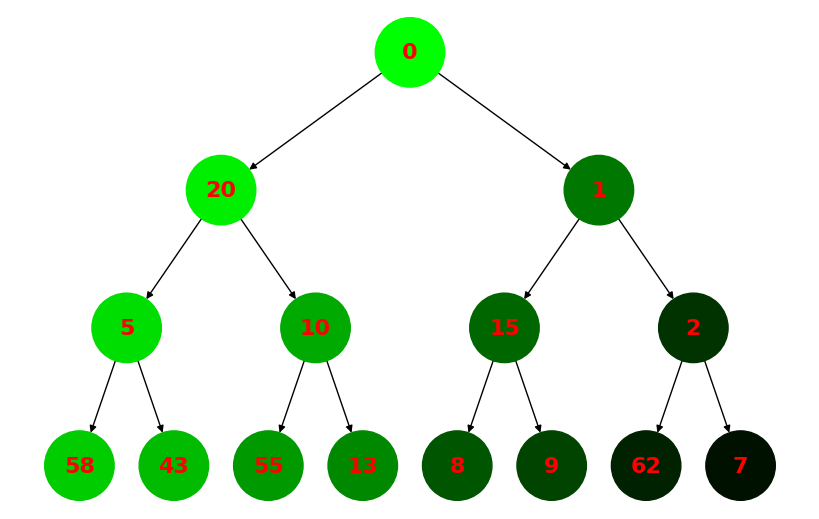

In [325]:
dfs_iterative(root)

## BFS обхід та візуалізація

In [326]:
def bfs_iterative(graph):
    visited = []
    queue = deque([graph])
    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=' -> ')
            visited.append(node)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
    x = 255
    length = len(visited)
    for node in visited:
        node.color = "#00" + f"{x:02x}" + "00"
        x -= int(255 / length)
    draw_tree(graph)

0 -> 20 -> 1 -> 5 -> 10 -> 15 -> 2 -> 58 -> 43 -> 55 -> 13 -> 8 -> 9 -> 62 -> 7 -> 

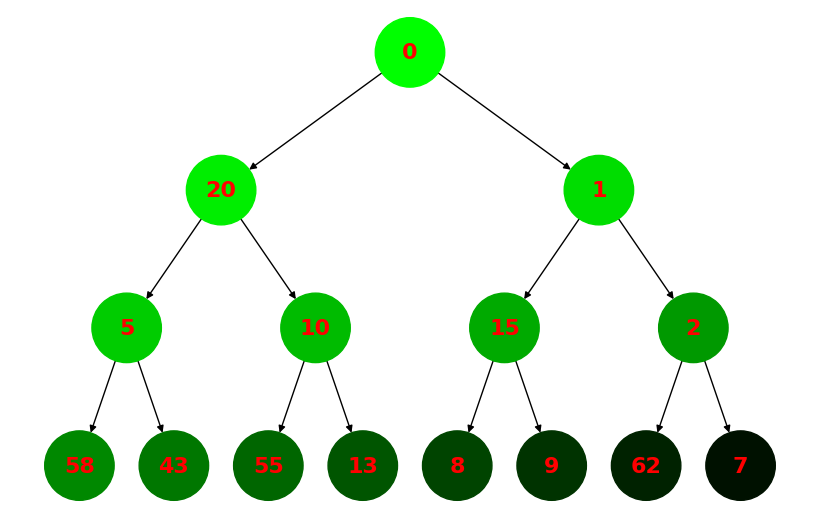

In [327]:
bfs_iterative(root)